In [5]:
 import numpy as np
 import pandas as pd
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import StandardScaler
 from sklearn.datasets import load_breast_cancer
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Dense, Dropout
 from tensorflow.keras.callbacks import EarlyStopping
 import matplotlib.pyplot as plt
 # Load Dataset
 data = load_breast_cancer()
 X = data.data
 y = data.target

In [6]:
 # Splitting the Dataset
 X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2,
 random_state=42)

In [7]:
 # Feature Scaling
 scaler = StandardScaler()
 X_train = scaler.fit_transform(X_train)
 X_test = scaler.transform(X_test)

In [8]:
 # Building the Model
 model = Sequential([
 Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
 Dropout(0.3),
 Dense(15, activation='relu'),
 Dropout(0.3),
 Dense(1, activation='sigmoid') # Sigmoid for binary classification
 ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy',
 metrics=['accuracy'])

In [10]:
 # Early Stopping
 early_stop = EarlyStopping(monitor='val_loss', patience=10,
 restore_best_weights=True)

In [15]:

 # Training the Model
 history = model.fit(
X_train, y_train,
 validation_split=0.2,
 epochs=100,
 batch_size=16,
 callbacks=[early_stop],
 verbose=1
 )

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3994 - loss: 0.8511 - val_accuracy: 0.8462 - val_loss: 0.5575
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7452 - loss: 0.5880 - val_accuracy: 0.9121 - val_loss: 0.3963
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8942 - loss: 0.4268 - val_accuracy: 0.9560 - val_loss: 0.2903
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9445 - loss: 0.2973 - val_accuracy: 0.9560 - val_loss: 0.2202
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9505 - loss: 0.2750 - val_accuracy: 0.9560 - val_loss: 0.1796
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9434 - loss: 0.2132 - val_accuracy: 0.9560 - val_loss: 0.1524
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9442 - loss: 0.1689 - val_accuracy: 0.9560 - val_loss: 0.1351
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9582 - loss: 0.1541 - val_accuracy: 0.9560 - 

In [18]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.98


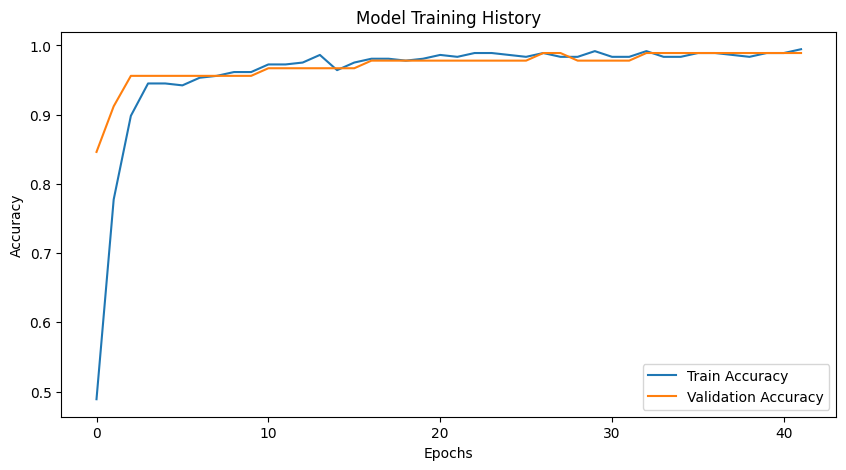

In [19]:
 # Plot Training History
 plt.figure(figsize=(10, 5))
 plt.plot(history.history['accuracy'], label='Train Accuracy')
 plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
 plt.xlabel('Epochs')
 plt.ylabel('Accuracy')
 plt.legend()
 plt.title('Model Training History')
 plt.show()